# GalCubeCraft — Initialisation notebook

This short notebook demonstrates how to initialise the `GalCubeCraft` generator, create a small set of synthetic IFU spectral cubes, and visualise one of them. The cells are documented with comments and explanatory markdown to make it easy to adapt the workflow for pretraining or quick experiments.

Requirements:
- `GalCubeCraft` installed in the active Python environment (or `pip install -e .` from the repo root)
- Optional plotting packages: `matplotlib`, `astrodendro` for diagnostics

What the notebook does:

1. Initialise a `GalCubeCraft` instance with a chosen configuration.
2. Generate a small number of cubes using `generate_cubes()`.
3. Visualise a selected cube with the bundled `visualise` helper.

Read the inline comments for parameter meanings and quick tips on saving/adjusting visuals.

In [ ]:
import GalCubeCraft  # package name (ensure the package is importable in this environment)

# Initialise the generator using the convenience wrapper in __init__.py.
# Parameters explained:
# - n_gals: number of galaxy components per cube (None -> random 1-3)
# - n_cubes: how many cubes to generate in this run
# - resolution: 'all'|'resolved'|'unresolved' (controls Re/beam ratio sampling)
# - final_grid_size: spatial size of output cube (pixels)

g = GalCubeCraft.init(n_gals=2, n_cubes=3, resolution='resolved', final_grid_size = 72, seed=42)

# Generate the cubes. This runs the pipeline and returns a list of tuples (cube, metadata).
# Each `cube` has shape (n_velocity, ny, nx). `metadata` contains keys like 'average_vels', 'beam_info', 'pix_spatial_scale', 'n_gals' etc.
sim = g.generate_cubes()

# Example: inspect the first result (optional)
print('Number of cubes generated:', len(sim))
print('First cube shape:', sim[0][0].shape)


[ § Creating 3 highly resolved cubes of dimensions 39.2 (spectral) x 72 x 72 (spatial) § ]



§--------------------- Creating cube # 1 ---------------------§
Creating disk #1...
Calculating the flux density values at each spatial location
Calculating and assigning velocity vectors...
Rotating 36.40 degrees about X axis and 73.47 degrees about Y axis:
1. Rotating/transforming the whole system...
2: Rotating the individual velocity vectors...
Disk #1 generated!

Creating disk #2...
Calculating the flux density values at each spatial location
Calculating and assigning velocity vectors...
Rotating 53.69 degrees about X axis and 172.09 degrees about Y axis:
1. Rotating/transforming the whole system...
2: Rotating the individual velocity vectors...
Disk #2 generated!

Creating spectral cube...
Centre of galaxy 1: [36 36 36]
Centre of galaxy 2: [39 31 35]
Galaxy 2 is closer than galaxy 1 by -0.64 kpc
→ Adjusting velocity cube by -0.05 km/s
Overlaying all galaxy observations in a bigger spati

# Explanation of the generation step

The `GalCubeCraft.init(...)` call above creates a `GalCubeCraft` object with the specified configuration. Key points:

- We set `n_gals=2` so each cube attempts to include two galaxy components (primary + satellite).
- `n_cubes=3` instructs the pipeline to create three independent cubes in this run.
- `resolution='resolved'` biases the sampling so the galaxies are larger relative to the beam (use `'unresolved'` or `'all'` for other regimes).
- `final_grid_size` controls the output spatial grid in pixels; smaller values reduce memory and speed up generation.
- `seed` is provided to make results reproducible.

After calling `generate_cubes()`, `sim` is a list where each element is `(cube_array, metadata_dict)`. Use `cube_array.shape` to inspect dimensions and `metadata_dict['average_vels']` to get the channel velocity centres.

# (The cell above initialises and generates cubes. The markdown cell that follows explains the key steps and choices.)

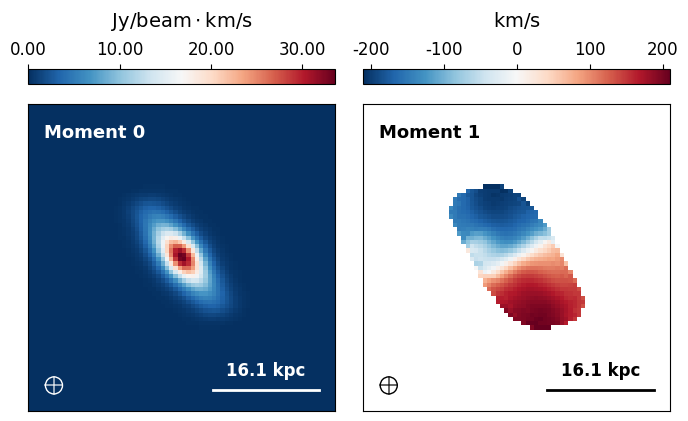

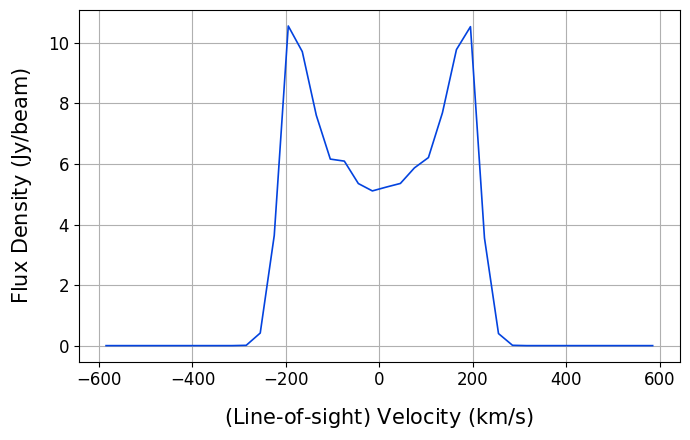

In [ ]:
# Visualise the first generated cube (index 0)

# `g.visualise(data, idx, save=False, fname_save=None)` displays moment-0 and moment-1 maps and a velocity spectrum.
# Set `save=True` to write PDF figures to disk (see README for default paths).
# Adjust `idx` to visualise other cubes in the `sim` list.
g.visualise(sim, idx=0)

## Visualization notes

The `visualise` helper computes a dendrogram-based mask to isolate emission and then shows:

- Moment-0 (integrated flux) with a scalebar and beam ellipse
- Moment-1 (intensity-weighted velocity) map
- Integrated velocity spectrum (flux vs velocity)

If you run headless or on a remote server, call `g.visualise(..., save=True, fname_save='my_figures')` to save PDFs instead of showing interactive windows.

You can also inspect `sim` directly to make custom plots with `matplotlib` using the arrays and metadata.